# General Comparison between Algorithms

Library loading:

In [1]:
from matplotlib import pyplot as plt
from notebooks import loaders as load
import numpy as np
import torch

Short explanation for method naming scheme:
- SARSA: Standard SARSA implementation learning a memoryless policy in the Delayed MDP
- DSARSA: Delay SARSA implementation learning a memoryless policy in the Delayed MDP
- TRPO: Standard TRPO implementation learning a policy in the the Augmented MDP
- M-TRPO: Standard TRPO implementation learning a memoryless policy in the Delayed MDP
- L2-TRPO: Delay TRPO with Deterministic Belief Module (L2-Loss)
- D-TRPO: Delay TRPO with Stochastic Belief Module (MAF)

## Data Loading & General Plot Settings

In [9]:
#sarsa_0_avg, sarsa_0_std = load.stats_train(method='sarsa', source='Results', test_type='Delay0')
sarsa_3_avg, sarsa_3_std = load.stats_train(method='sarsa', source='Results', test_type='Delay3')
sarsa_5_avg, sarsa_5_std = load.stats_train(method='sarsa', source='Results', test_type='Delay5')
sarsa_10_avg, sarsa_10_std = load.stats_train(method='sarsa', source='Results', test_type='Delay10')
sarsa_15_avg, sarsa_15_std = load.stats_train(method='sarsa', source='Results', test_type='Delay15')
sarsa_20_avg, sarsa_20_std = load.stats_train(method='sarsa', source='Results', test_type='Delay20')

dsarsa_3_avg, dsarsa_3_std = load.stats_train(method='dsarsa', source='Results', test_type='Delay3')
dsarsa_5_avg, dsarsa_5_std = load.stats_train(method='dsarsa', source='Results', test_type='Delay5')
dsarsa_10_avg, dsarsa_10_std = load.stats_train(method='dsarsa', source='Results', test_type='Delay10')
dsarsa_15_avg, dsarsa_15_std = load.stats_train(method='dsarsa', source='Results', test_type='Delay15')
dsarsa_20_avg, dsarsa_20_std = load.stats_train(method='dsarsa', source='Results', test_type='Delay20')

trpo_0_avg, trpo_0_std = load.stats_train(method='trpo', source='AISTATS', test_type='Delay0')
trpo_3_avg, trpo_3_std = load.stats_train(method='trpo', source='Augmented', test_type='Delay3', epoch=2000)
trpo_5_avg, trpo_5_std = load.stats_train(method='trpo', source='Augmented', test_type='Delay5', epoch=2000)
trpo_10_avg, trpo_10_std = load.stats_train(method='trpo', source='Augmented', test_type='Delay10', epoch=2000)
trpo_15_avg, trpo_15_std = load.stats_train(method='trpo', source='AISTATS', test_type='Delay15')
trpo_20_avg, trpo_20_std = load.stats_train(method='trpo', source='AISTATS', test_type='Delay20')

mtrpo_3_avg, mtrpo_3_std = load.stats_train(method='trpo', source='Memoryless', test_type='Delay3', epoch=2000)
mtrpo_5_avg, mtrpo_5_std = load.stats_train(method='trpo', source='Memoryless', test_type='Delay5', epoch=2000)
mtrpo_10_avg, mtrpo_10_std = load.stats_train(method='trpo', source='Memoryless', test_type='Delay10', epoch=2000)
mtrpo_15_avg, mtrpo_15_std = load.stats_train(method='trpo', source='Memoryless', test_type='Delay15', epoch=2000)
mtrpo_20_avg, mtrpo_20_std = load.stats_train(method='trpo', source='Memoryless', test_type='Delay20', epoch=2000)

l2trpo_3_avg, l2trpo_3_std = load.stats_train(method='dtrpo', source='AISTATS', test_type='DET-Delay3')
l2trpo_5_avg, l2trpo_5_std = load.stats_train(method='dtrpo', source='AISTATS', test_type='DET-Delay5')
l2trpo_10_avg, l2trpo_10_std = load.stats_train(method='dtrpo', source='AISTATS', test_type='DET-Delay10-500Epochs')
l2trpo_15_avg, l2trpo_15_std = load.stats_train(method='dtrpo', source='AISTATS', test_type='DET-Delay15-500Epochs')
l2trpo_20_avg, l2trpo_20_std = load.stats_train(method='dtrpo', source='AISTATS', test_type='DET-Delay20')

dtrpo_3_avg, dtrpo_3_std = load.stats_train(method='dtrpo', source='Results', test_type='MAF-Delay3', epoch=2000)
dtrpo_5_avg, dtrpo_5_std = load.stats_train(method='dtrpo', source='Results', test_type='MAF-Delay5', epoch=2000)
dtrpo_10_avg, dtrpo_10_std = load.stats_train(method='dtrpo', source='Results', test_type='MAF-Delay10', epoch=2000)

In [ ]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes', titlesize='x-large')
plt.rc('axes', labelsize='large')

## SARSA vs TRPO on Delay=0
Notice that without delays, DSARSA is equivalent to standard SARSA and L2-TRPO/M-TRPO/D-TRPO is equivalent to TRPO.

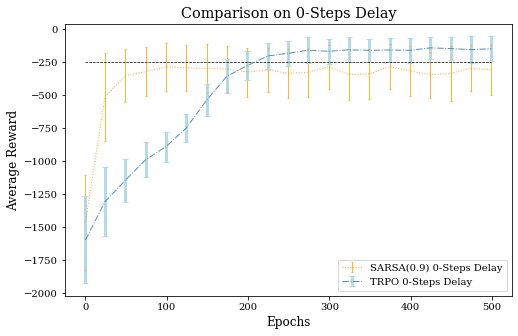

In [40]:
# Plot Range Settings
episode_num = len(trpo_3_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, sarsa_0_avg[epochs], yerr=sarsa_0_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='SARSA(0.9) 0-Steps Delay')
ax.errorbar(epochs, trpo_0_avg[epochs], yerr=trpo_0_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='TRPO 0-Steps Delay')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_title('Comparison on 0-Steps Delay')
ax.set_xticks(np.arange(0, 501, 100))
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./Comparison_0_delay.png', dpi=1000)

## Comparison on Delay=3

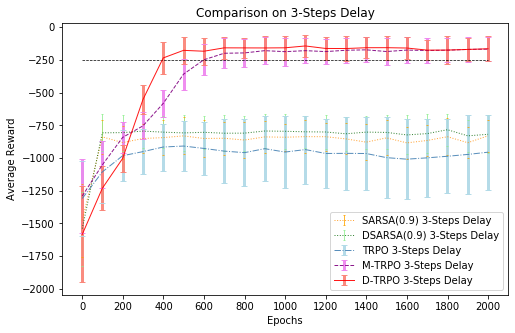

In [15]:
# Plot Range Settings
episode_num = len(trpo_3_avg)
epochs = np.arange(-1, episode_num, 100)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, sarsa_3_avg[epochs], yerr=sarsa_3_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='SARSA(0.9) 3-Steps Delay')
ax.errorbar(epochs, dsarsa_3_avg[epochs], yerr=dsarsa_3_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='DSARSA(0.9) 3-Steps Delay')
ax.errorbar(epochs, trpo_3_avg[epochs], yerr=trpo_3_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='TRPO 3-Steps Delay')
ax.errorbar(epochs, mtrpo_3_avg[epochs], yerr=mtrpo_3_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='M-TRPO 3-Steps Delay')
#ax.errorbar(epochs, l2trpo_3_avg[epochs], yerr=l2trpo_3_std[epochs], color='red', ls='solid',
#            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='L2-TRPO 3-Steps Delay')
ax.errorbar(epochs, dtrpo_3_avg[epochs], yerr=dtrpo_3_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='D-TRPO 3-Steps Delay')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_xticks(np.arange(0, 2001, 200))
ax.set_title('Comparison on 3-Steps Delay')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./Comparison_3_delay.png', dpi=1000)

## Comparison on Delay=5

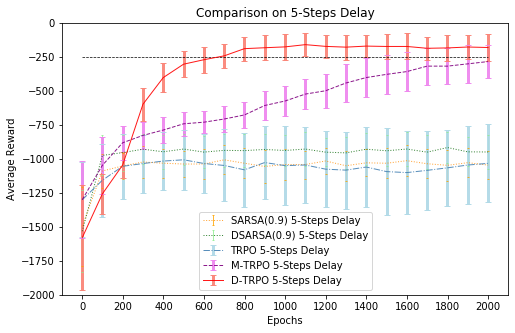

In [14]:
# Plot Range Settings
episode_num = len(trpo_5_avg)
epochs = np.arange(-1, episode_num, 100)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, sarsa_5_avg[epochs], yerr=sarsa_5_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='SARSA(0.9) 5-Steps Delay')
ax.errorbar(epochs, dsarsa_5_avg[epochs], yerr=dsarsa_5_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='DSARSA(0.9) 5-Steps Delay')
ax.errorbar(epochs, trpo_5_avg[epochs], yerr=trpo_5_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='TRPO 5-Steps Delay')
ax.errorbar(epochs, mtrpo_5_avg[epochs], yerr=mtrpo_5_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='M-TRPO 5-Steps Delay')
#ax.errorbar(epochs, l2trpo_5_avg[epochs], yerr=l2trpo_5_std[epochs], color='red', ls='solid',
#            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='L2-TRPO 5-Steps Delay')
ax.errorbar(epochs, dtrpo_5_avg[epochs], yerr=dtrpo_5_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='D-TRPO 5-Steps Delay')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 2001, 200))
ax.set_title('Comparison on 5-Steps Delay')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./Comparison_5_delay.png', dpi=1000)

## Comparison on Delay=10

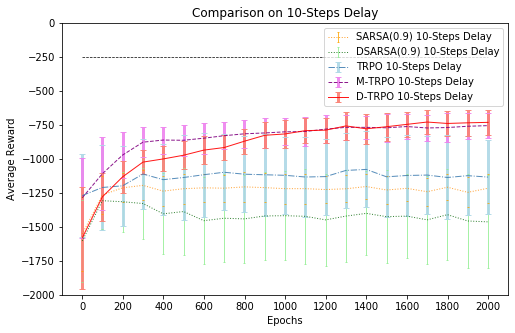

In [13]:
# Plot Range Settings
episode_num = len(trpo_10_avg)
epochs = np.arange(-1, episode_num, 100)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, sarsa_10_avg[epochs], yerr=sarsa_10_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='SARSA(0.9) 10-Steps Delay')
ax.errorbar(epochs, dsarsa_10_avg[epochs], yerr=dsarsa_10_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='DSARSA(0.9) 10-Steps Delay')
ax.errorbar(epochs, trpo_10_avg[epochs], yerr=trpo_10_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='TRPO 10-Steps Delay')
ax.errorbar(epochs, mtrpo_10_avg[epochs], yerr=mtrpo_10_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='M-TRPO 10-Steps Delay')
#ax.errorbar(epochs, l2trpo_10_avg[epochs], yerr=l2trpo_10_std[epochs], color='red', ls='solid',
#            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='L2-TRPO 10-Steps Delay')
ax.errorbar(epochs, dtrpo_10_avg[epochs], yerr=dtrpo_10_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='D-TRPO 10-Steps Delay')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 2001, 200))
ax.set_title('Comparison on 10-Steps Delay')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./Comparison_10_delay.png', dpi=1000)

## Comparison on Delay=15

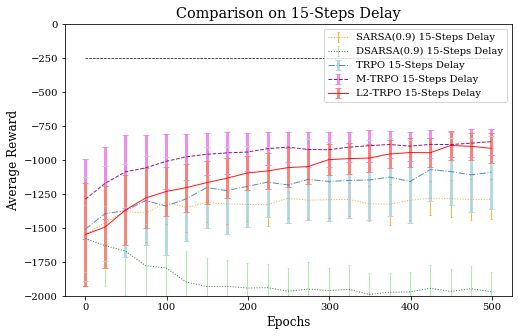

In [59]:
# Plot Range Settings
episode_num = len(trpo_15_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, sarsa_15_avg[epochs], yerr=sarsa_15_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='SARSA(0.9) 15-Steps Delay')
ax.errorbar(epochs, dsarsa_15_avg[epochs], yerr=dsarsa_15_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='DSARSA(0.9) 15-Steps Delay')
ax.errorbar(epochs, trpo_15_avg[epochs], yerr=trpo_15_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='TRPO 15-Steps Delay')
ax.errorbar(epochs, mtrpo_15_avg[epochs], yerr=mtrpo_15_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='M-TRPO 15-Steps Delay')
ax.errorbar(epochs, l2trpo_15_avg[epochs], yerr=l2trpo_15_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='L2-TRPO 15-Steps Delay')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Comparison on 15-Steps Delay')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./Comparison_15_delay.png', dpi=1000)

## Comparison on Delay=20

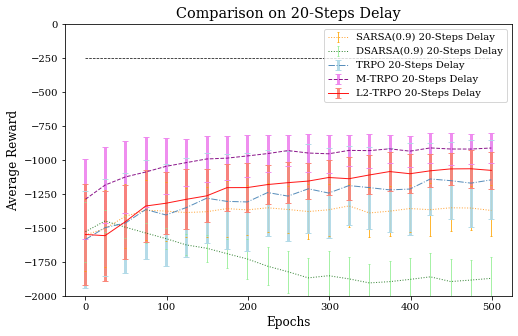

In [60]:
# Plot Range Settings
episode_num = len(trpo_20_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, sarsa_20_avg[epochs], yerr=sarsa_20_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='SARSA(0.9) 20-Steps Delay')
ax.errorbar(epochs, dsarsa_20_avg[epochs], yerr=dsarsa_20_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='DSARSA(0.9) 20-Steps Delay')
ax.errorbar(epochs, trpo_20_avg[epochs], yerr=trpo_20_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='TRPO 20-Steps Delay')
ax.errorbar(epochs, mtrpo_20_avg[epochs], yerr=mtrpo_20_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='M-TRPO 20-Steps Delay')
ax.errorbar(epochs, l2trpo_20_avg[epochs], yerr=l2trpo_20_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='L2-TRPO 20-Steps Delay')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Comparison on 20-Steps Delay')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./Comparison_20_delay.png', dpi=1000)

